# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [7]:
import pandas as pd
import numpy as np
from itertools import combinations
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
#Загрузим данные
churn_data = pd.read_csv("orange_small_churn_data.train", sep=",")
churn_labels = pd.read_csv("orange_small_churn_labels.train", sep=",", header=None, names=["target"])

взглянем на данные

In [9]:
churn_data.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,570.000000,1006.000000,1005.000000,1275.000000,1.165000e+03,35565.000000,35560.000000,0.0,570.000000,1.165000e+03,...,1.006000e+03,1006.000000,0.0,570.000000,570.00000,1006.000000,16785.000000,266.000000,0.0,0.0
mean,11.003509,0.004970,429.328358,0.148235,2.490555e+05,1319.915394,6.792126,NaN,47.487719,3.813466e+05,...,8.067657e+04,7.419483,NaN,3.515789,16.05614,165.108310,270.585523,22637.159019,NaN,NaN
std,34.952792,0.157642,4470.405915,1.396054,6.762021e+05,2609.955770,6.287285,NaN,147.137816,9.353348e+05,...,2.141650e+05,34.642351,NaN,9.412473,54.96505,113.400173,86.723561,30843.320634,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2419.965000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,196.410000,270.000000,12612.240000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.172150e+05,1435.000000,7.000000,NaN,46.000000,2.419740e+05,...,4.260950e+04,8.000000,NaN,6.000000,14.00000,250.980000,330.000000,32209.560000,NaN,NaN
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,35.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1000.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [10]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 70.2+ MB


In [11]:
churn_data.head(5)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [12]:
churn_labels.describe()

,target
count,40000.000000
mean,-0.851200
std,0.524848
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


In [13]:
churn_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
target    40000 non-null int64
dtypes: int64(1)
memory usage: 312.6 KB


In [14]:
churn_labels.head(5)

,target
0,-1
1,-1
2,-1
3,1
4,-1


In [15]:
# список столбцов с вещественными переменными
columns_float = ['Var' + str(x) for x in range(1, 191)]

# список столбцов с категориальными переменными
columns_cat = ['Var' + str(x) for x in range(191, len(churn_data.columns)+1)]

2\. Рассчитайте доли классов `отток` и `не отток`.

In [16]:
total_rows = churn_labels.shape[0]
# доля класса "отток"
churn_rate = churn_labels.target.value_counts().loc[1] / float(total_rows)

# доля класса "не отток"
nonchurn_rate = churn_labels.target.value_counts().loc[-1] / float(total_rows)

print("Доля класса 'отток':" + str(churn_rate))
print("Доля класса 'не отток':" + str(nonchurn_rate))

Доля класса 'отток':0.0744
Доля класса 'не отток':0.9256


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

Поскольку целевая переменная является бинарной, а первые 190 признака - вещественными, мерой оценки зависимости для них будем считать разность математических ожиданий признака при условиях равенства целевой переменной 1 и -1. Оставшиеся признаки являются категориальными, для них используем коэффициент V Крамера

3.1 Посмотрим на первые 190 признаков:

In [17]:
# оценка корреляции первых 190 признаков - изменение выборочного среднего 
# при переходе от класса 'не отток' к классу 'отток'. Чем больше это изменение (разность), тем сильнее взаимосвязь

# сначала отмасштабируем признаки для того, чтобы результаты для разных признаков были сравнимы
churn_data_scaled = (churn_data[columns_float] - churn_data[columns_float].mean()) / churn_data[columns_float].std()

In [18]:
# оценка среднего для класса 'не отток' по всем вещественным признакам
nonchurn_mean = churn_data_scaled[churn_labels.target == -1][columns_float].mean()

#оценка среднего для класса 'отток' по всем вещественным признакам
churn_mean = churn_data_scaled[churn_labels.target == 1][columns_float].mean()

# отклонение средних (нас будет интересовать только абсолютное отклонение)
corr_estimation = abs(nonchurn_mean - churn_mean) 
corr_estimation.iloc[:5] # быстрый взгляд на результат

Var1    0.047793
Var2    0.032868
Var3    0.037532
Var4    0.011529
Var5    0.099009
dtype: float64

C помощью критерия Манна-Уитни оценим для каждого признака гипотезу о том, что выборки для обоих классов взяты из одного и того же распределения против двусторонней альтернативы о том, что выборки смещены друг относительно друга. Т.е., другими словами, оценим значимость полученной разницы средних каждого признака и выбросим те из них, для которых мы не можем отвергнуть нулевую гипотезу на уровне 0.05.

In [20]:
# var_pvalues - достигаемые уровни значимости по критерию Манна-Уитни 
var_pvalues = {}
for col in columns_float:
    var_pvalues[col] = mannwhitneyu(churn_data[churn_labels.target == -1][col],
                                    churn_data[churn_labels.target == 1][col],
                                    alternative='two-sided')[1]

In [21]:
df = pd.DataFrame.from_dict(data=var_pvalues, orient='index')
df.columns = ['pval']
df['mean_diff'] = corr_estimation
df.head() # получили датафрейм с отклонениями средних и достигаемым уровнем значимости каждого признака

,pval,mean_diff
Var115,3.487965e-232,0.169092
Var114,4.433726e-225,0.258904
Var117,5.945907e-223,0.025722
Var116,9.998059e-234,0.027578
Var111,4.578240e-228,0.366898


In [22]:
# отсоритруем датафрейм по убыванию отклонения средних, выбросив предварительно незначимые отклонения (с pvalue > 0.05)
top20_float_vars = df[df.pval < 0.05].sort_values('mean_diff', ascending=False).iloc[:20].index

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [23]:
# top 20 числовых переменных, наиболее сильно коррелирующих с целевой переменной (в порядке убывания корреляции)
top20_float_vars

Index([u'Var168', u'Var188', u'Var189', u'Var131', u'Var111', u'Var19',
       u'Var53', u'Var177', u'Var7', u'Var73', u'Var114', u'Var139', u'Var92',
       u'Var126', u'Var130', u'Var113', u'Var77', u'Var110', u'Var142',
       u'Var144'],
      dtype='object')

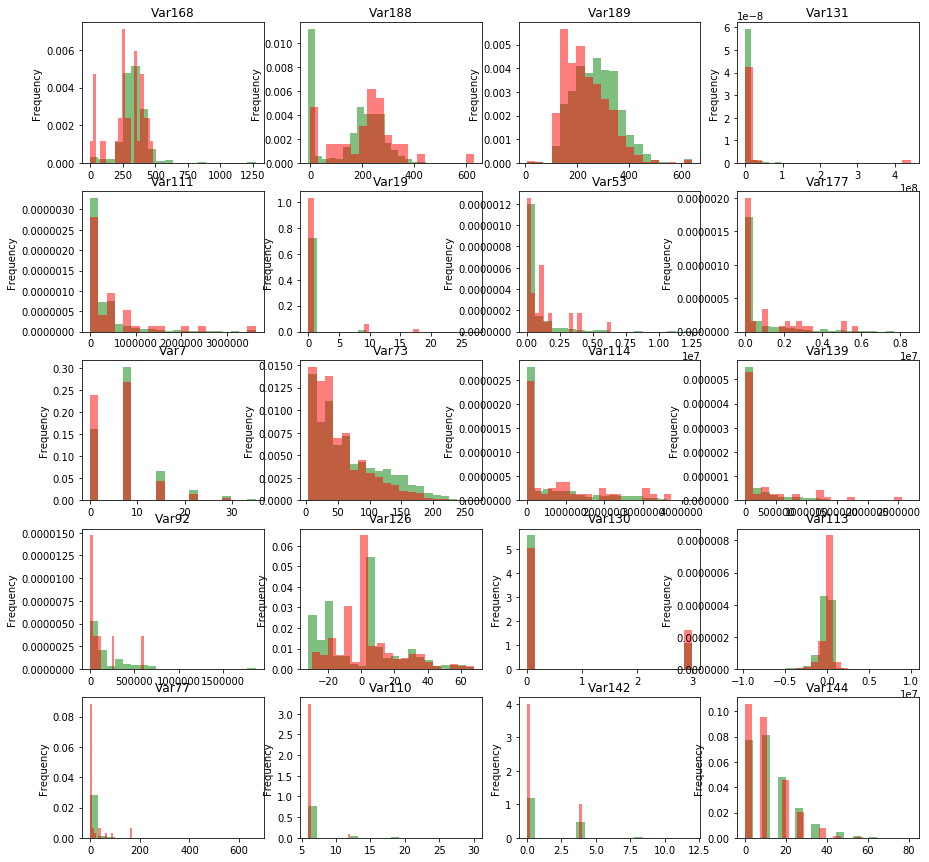

In [25]:
# построим гистограммы распределения топ-20 числовых признаков
# зеленые - хорошие (не отток), красные - плохие (отток)
plot_cols = 4
fig = plt.figure(num=1, figsize=(15,15))
for i, var_float in enumerate(top20_float_vars):
    ax = plt.subplot(20/plot_cols, plot_cols, i+1)
    ax.set_title(var_float)
    churn_data.loc[churn_labels.target == -1, var_float].dropna().plot(kind='hist', ax = ax, bins=20, 
                                                                       color='green', alpha=0.5, normed=True)
    churn_data.loc[churn_labels.target == 1, var_float].dropna().plot(kind='hist', ax = ax, bins=20, 
                                                                      color='red', alpha=0.5, normed=True)

plt.show()
plt.clf()

In [26]:
churn_data.loc[:, ['Var1', 'Var2']].dropna().shape

(0, 2)

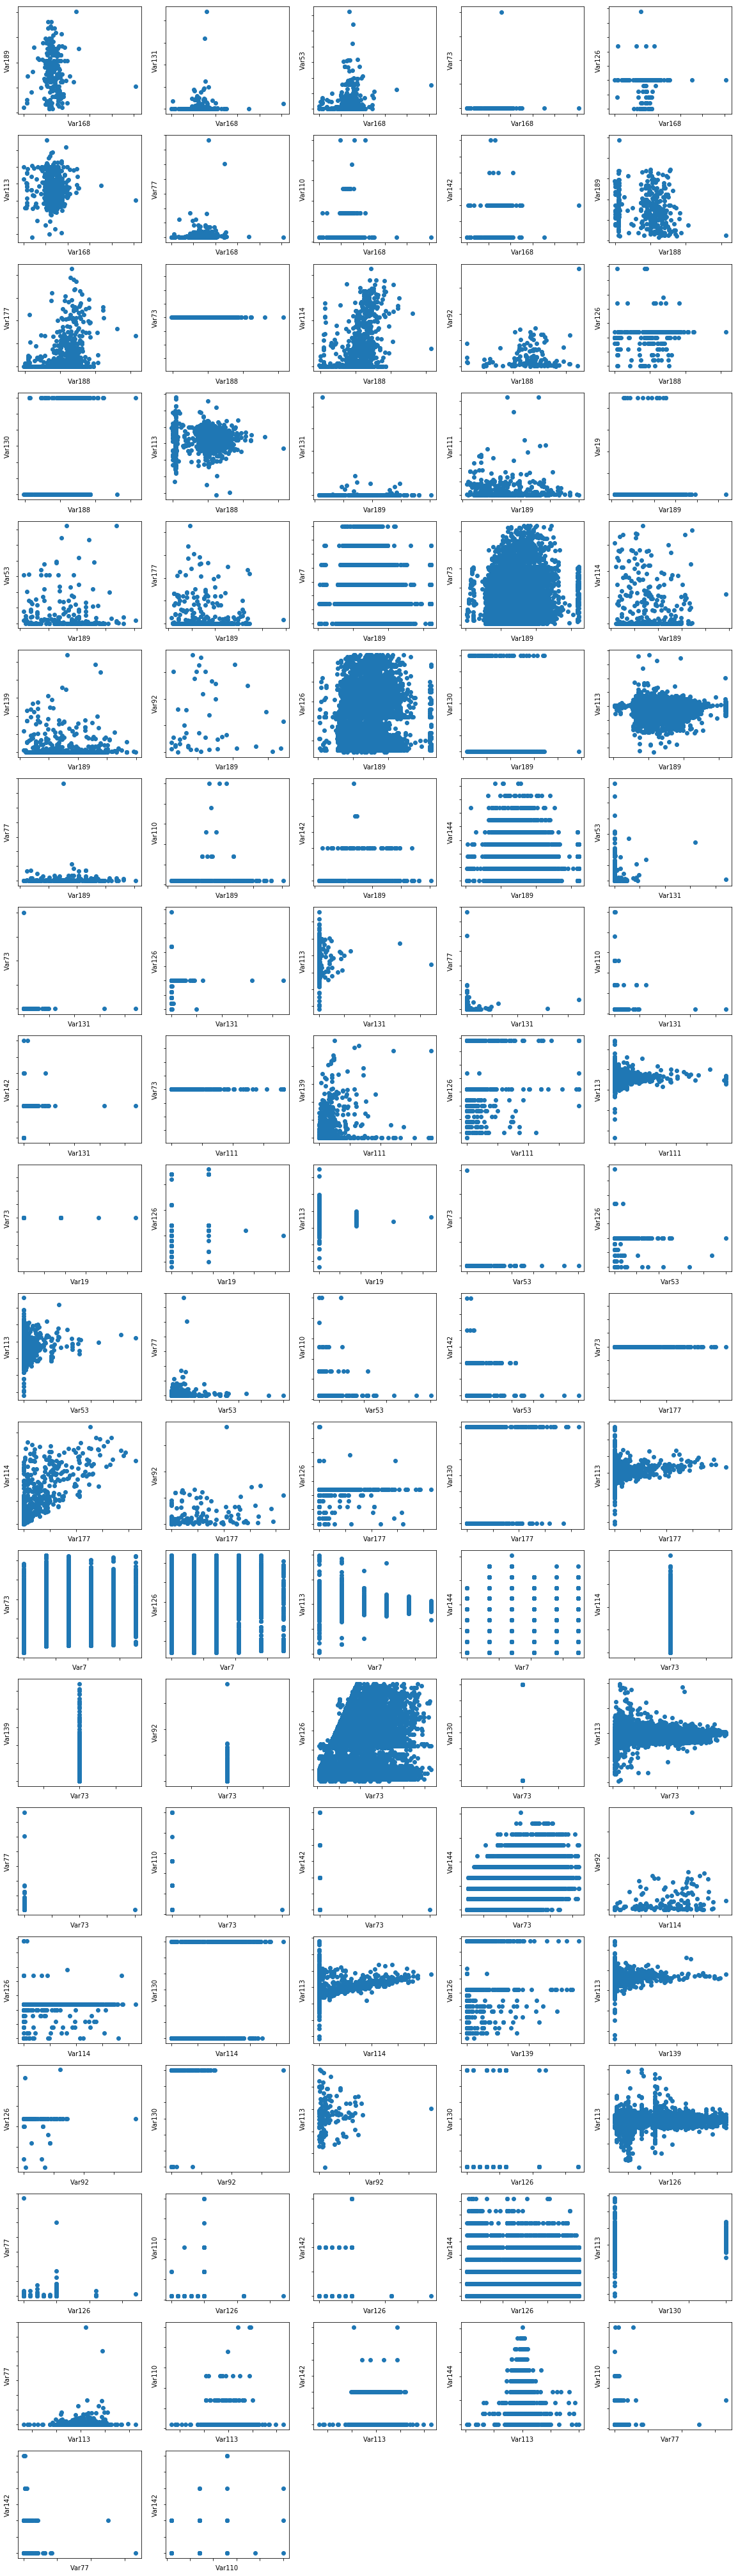

In [27]:
# отобразим объекты в координатах пар признаков
# сформируем все возможные пары признаков из топ-20 числовых и для каждой пары отобразим scatter-plot


plot_cols = 5
top20_pairs = list(combinations(top20_float_vars, 2))
fig2 = plt.figure(num=2, figsize=(20,140))
plot_num = 1
for i, pair in enumerate(top20_pairs):
    pair_vardf = churn_data.loc[:, pair].dropna() #подготовим попарный временный датафрейм без NaN для отрисовки
    if pair_vardf.shape[0] > 0: # отображаем только непустые пары
        ax = plt.subplot(len(top20_pairs)/plot_cols, plot_cols, plot_num)

        # подпишем оси названиями соответствующих переменных
        ax.set_xlabel(pair[0])
        ax.set_ylabel(pair[1])

        # но метки шкал уберем, в данном случае они нас не интересуют (и мешают)
        ax.set_yticklabels([])
        ax.set_xticklabels([])        
        ax.scatter(x=pair_vardf[pair[0]].values, y=pair_vardf[pair[1]].values)
        plot_num += 1

plt.show()
plt.clf()

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [32]:
import random
random.seed(37)
#map(lambda x: 'Var'+ str(x), random.sample(range(1, 191), 10))

map(lambda i: columns_float[i], random.sample(range(1, len(columns_float)), 10))

['Var130',
 'Var19',
 'Var118',
 'Var161',
 'Var159',
 'Var99',
 'Var121',
 'Var71',
 'Var101',
 'Var22']

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?